In [32]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
with open("graph.json", "r") as f:
    data = json.load(f)
G = nx.node_link_graph(data) 


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


In [3]:
def visualize_graph_without(G):
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, seed=42)  

 
    nx.draw(G, pos, node_color="lightblue", node_size=20, edge_color='gray', with_labels=False)

    plt.show()

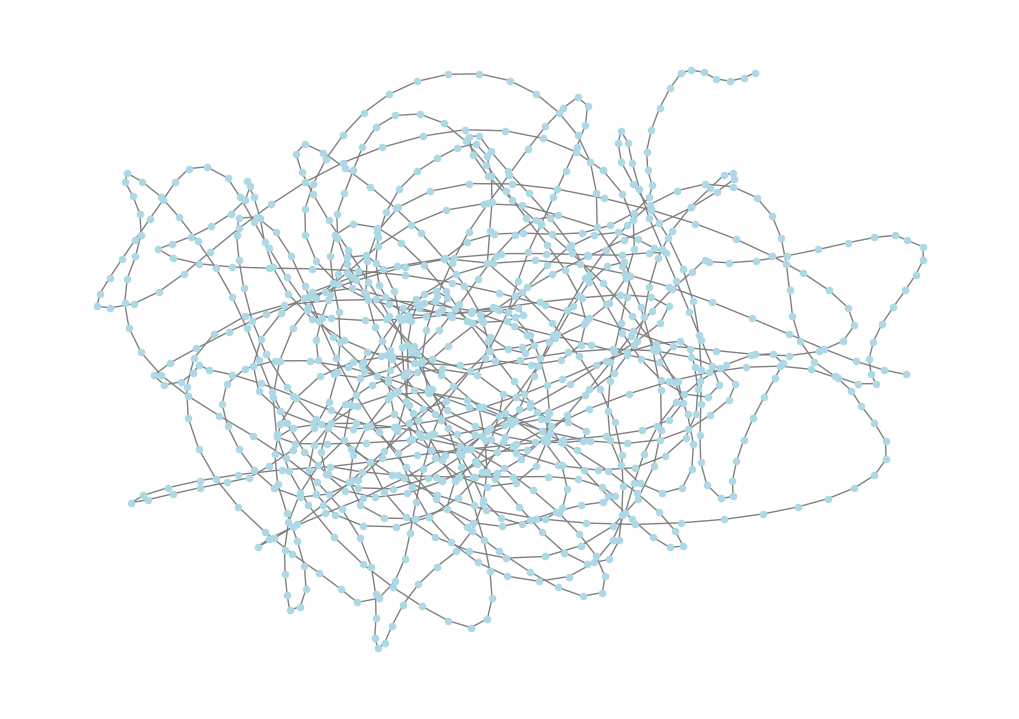

In [5]:
visualize_graph_without(G)

In [7]:
len(G.nodes)

1000

In [10]:
len(G.edges)

1015

Loading the graph 

In [11]:
def compute_centrality(G):
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G, k=10) 
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-6)

    centrality_scores = {}
    for node in G.nodes():
        d = degree_centrality[node]
        c = closeness_centrality[node]
        b = betweenness_centrality[node]
        e = eigenvector_centrality[node]
        centrality_scores[node] = d + c + b + e 

    return centrality_scores, degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality

In [13]:
c = compute_centrality(G)

Computing the combined centrality using a linear combination of the values 

In [28]:
def visualize_graph(G, centrality_scores):
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, seed=42)

    scores = np.array(list(centrality_scores.values()))
    min_score, max_score = min(scores), max(scores)
    normalized_scores = (scores - min_score) / (max_score - min_score)

    sorted_nodes = sorted(centrality_scores.items(), key=lambda x: x[1], reverse=True)
    top_10_nodes = {node for node, _ in sorted_nodes[:10]}

    node_colors = [plt.cm.plasma(score) if node not in top_10_nodes else "red" for node, score in zip(G.nodes, normalized_scores)]
    node_sizes = [500 if node in top_10_nodes else 50 for node in G.nodes]

    nx.draw(G, pos, node_color=node_colors, node_size=node_sizes, edge_color='gray', with_labels=False)
    plt.show()
    print(top_10_nodes)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1044: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


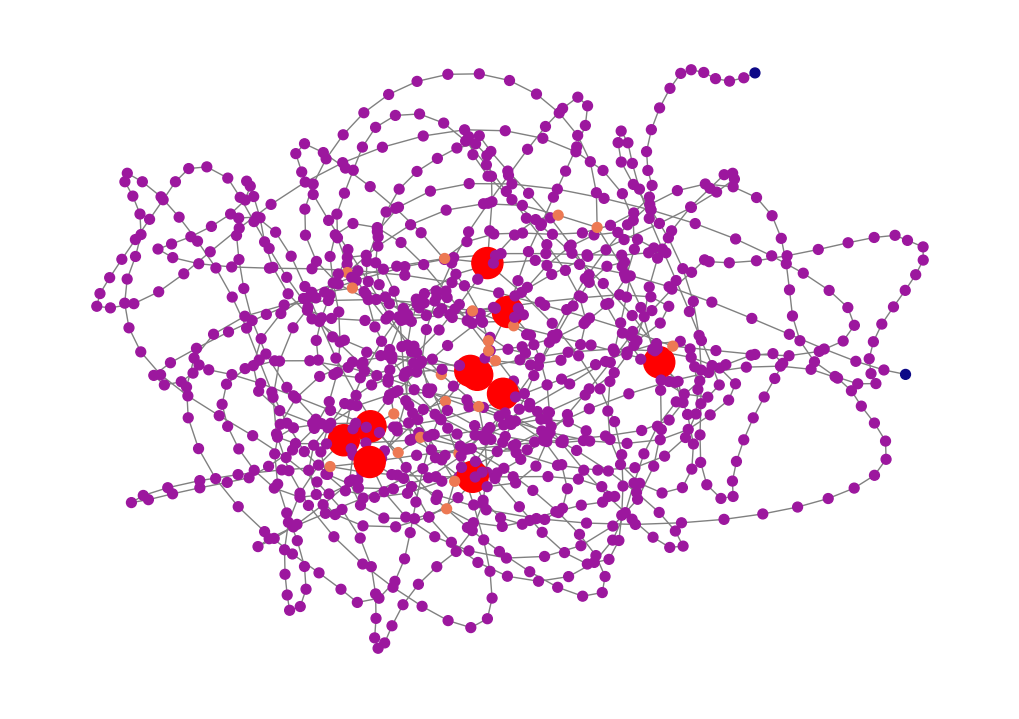

{129, 994, 193, 226, 330, 16, 305, 337, 86, 349}


In [29]:
visualize_graph(G,c[1])

In [31]:
def print_selected_nodes(c, target_nodes):
    if not isinstance(c, tuple) or len(c) == 0:
        print("Error: c is not a valid tuple!")
        return

    centrality_dict = c[0]  

    if not isinstance(centrality_dict, dict):
        print("🚨 Error: First element is not a dictionary!")
        return

    print("\n📌 Extracting Selected Node Values 📌")
    print("=" * 40)
    print("🔹 **Centrality Measure** 🔹")
    print("-" * 40)

  
    filtered_values = {node: centrality_dict[node] for node in target_nodes if node in centrality_dict}
    sorted_nodes = sorted(filtered_values.items(), key=lambda x: x[1], reverse=True)

    for node, score in sorted_nodes:
        print(f"  ✅ Node {node}: {score:.5f}")

    print("=" * 40)

# Example Usage
target_nodes = {129, 994, 193, 226, 330, 16, 305, 337, 86, 349}
print_selected_nodes(c, target_nodes)



📌 Extracting Selected Node Values 📌
🔹 **Centrality Measure** 🔹
----------------------------------------
  ✅ Node 193: 0.57844
  ✅ Node 330: 0.48321
  ✅ Node 994: 0.37507
  ✅ Node 86: 0.27457
  ✅ Node 129: 0.27193
  ✅ Node 349: 0.13711
  ✅ Node 16: 0.13035
  ✅ Node 337: 0.11247
  ✅ Node 305: 0.08684
  ✅ Node 226: 0.05686


In [35]:
X_scaled = StandardScaler().fit_transform(np.array(c[1][0]).reshape(-1, 1))
pca = PCA(n_components=1)
pca.fit(X_scaled)
weights = pca.components_[0]
weights /= np.sum(np.abs(weights)) 

combined_score = X_scaled @ weights

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
